In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import datetime as dt
import matplotlib as mpl
import geopandas
import seaborn as sns


from pynhd import NLDI, WaterData, NHDPlusHR
import pynhd as nhd

## Plotting parameters
mpl.rcParams['pdf.fonttype'] = 42

## Cubic feet to cubic meters conversion factor
cfs_2_cms = 0.0283168466

In [4]:
vaa = nhd.nhdplus_vaa("input_data/nhdplus_vaa.parquet")

In [5]:
df_comid = pd.read_csv("../data/pnwNPall_InfowStats.csv")
df_HydroClass = pd.read_csv("../data/pnwNP_StatsLocations_HydroClass.csv")
df_kge = pd.read_csv("../data/KGE_gages.csv")

In [10]:
df = df_comid[df_comid["gage"].isin(df_kge['gage'])].reset_index(drop=True)
df = df[["gage","comid"]]
df = df.merge(vaa,on="comid")
df = df.merge(df_HydroClass,on="gage")

In [12]:
df.groupby(["HydroLandClass"]).count()

,gage,comid,streamleve,streamorde,streamcalc,fromnode,tonode,hydroseq,levelpathi,pathlength,...,propZero,propOne,startDate,endDate,numObs,geometry,index_right,ID,CLASS,CLASS_NO
HydroLandClass,,,,,,,,,,,,,,,,,,,,,
arid,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
dry,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
moist,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
semi_arid,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
very_wet,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
wet,57,57,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57


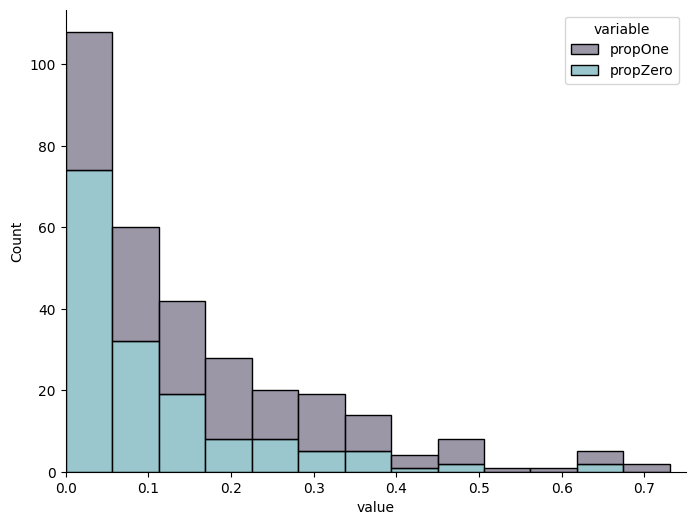

In [27]:
f,ax = plt.subplots(figsize=(8, 6))
toPlot = df[["propOne","propZero"]]
toPlot = toPlot.melt()
sns.histplot(toPlot,
             x = "value",
             hue = "variable",
             multiple = "stack",palette=["#7A748A","#79B5BD"])
ax.set_xlim([0,.75])
sns.despine()

plt.savefig("../docs/PropZero_One.pdf")

C:\Users\adamprice\AppData\Local\Temp\ipykernel_30448\3898405549.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Very-wet","Wet","Moist","Dry","Semi-arid","Arid"])


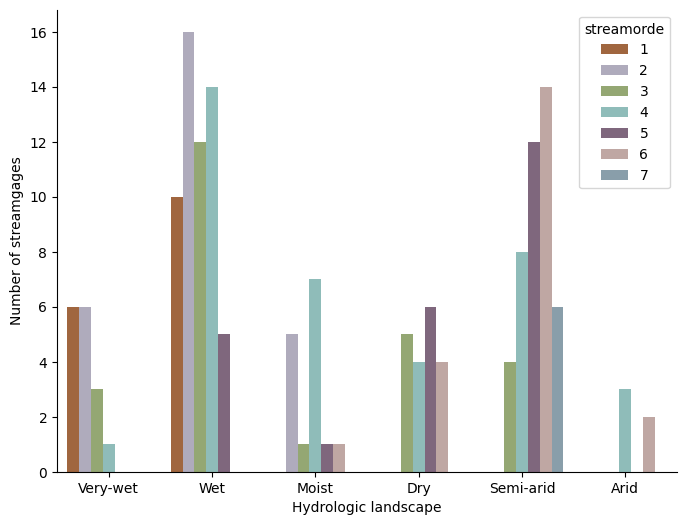

In [132]:
f,ax = plt.subplots(figsize=(8, 6))


pal = {1: '#B0632F',
       2: '#AEA8BF',
       7: '#839FAF',
       4: '#87C4BF',
       5: '#836381',
       6:'#C4A49E',
       3:"#96B06A"}


my_order = ["very_wet",
            "wet",
            "moist",
            "dry",
            "semi_arid",
            "arid"]

ax = sns.countplot(df, 
                 x='HydroLandClass',
                 hue="streamorde",
                palette=pal,
                order = my_order)
        
sns.despine()
ax.set_xticklabels(["Very-wet","Wet","Moist","Dry","Semi-arid","Arid"])
ax.set(ylabel="Number of streamgages")
ax.set(xlabel="Hydrologic landscape")

f.savefig('../docs/PNWgages_StreamOrder.png',dpi=600)

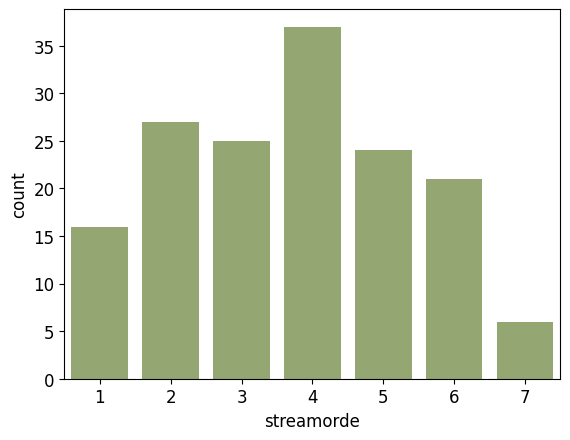

In [165]:
g = sns.countplot(df, 
                 x='streamorde',
                color="#96B06A")

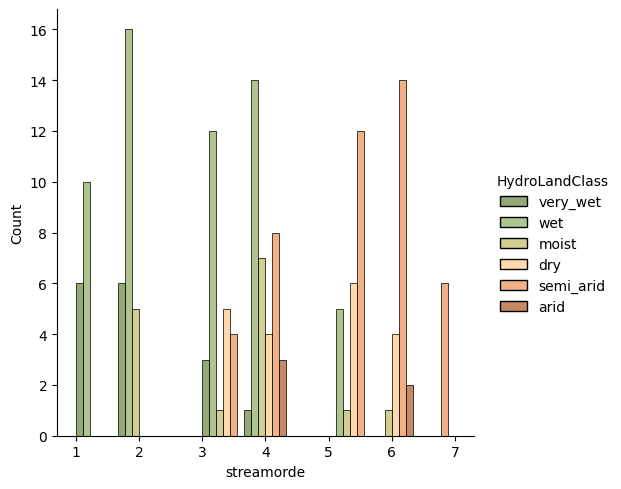

In [105]:
sns.displot(df, x="streamorde", 
            hue="HydroLandClass",
            multiple="dodge",
            hue_order=my_order,
            palette=pal)

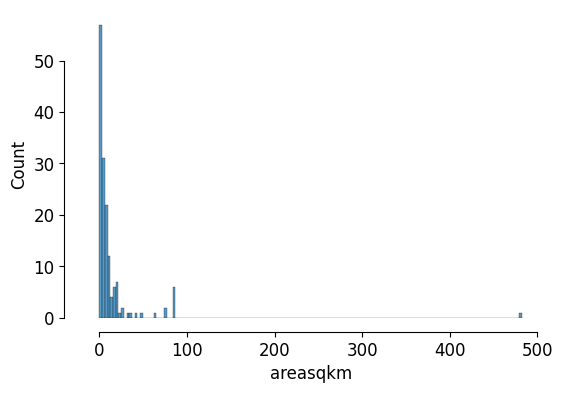

In [164]:
plt.figure(figsize=(6,4))
sns.histplot(data = df,x = "areasqkm")
sns.despine(offset=10, trim=True);

<Axes: xlabel='HydroLandClass', ylabel='areasqkm'>

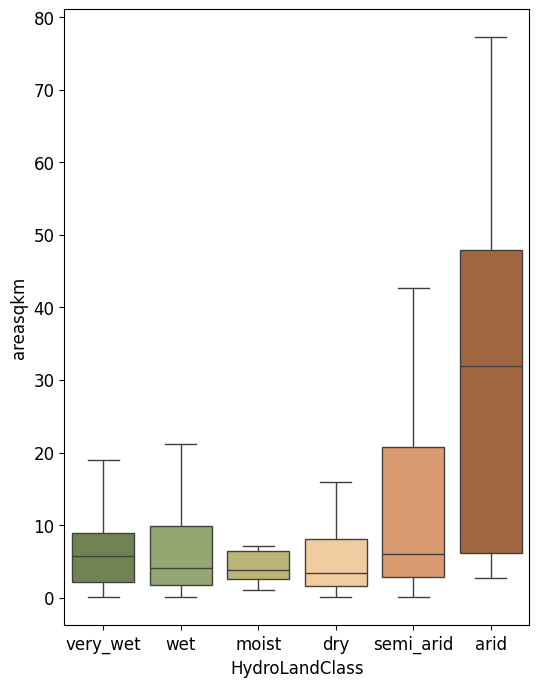

In [143]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(6,8))

my_order = ["very_wet",
            "wet",
            "moist",
            "dry",
            "semi_arid",
            "arid"]

pal = {'very_wet': '#728C48',
       'wet': '#96B06A',
       'moist': '#C6BD6C',
       'dry': '#FFCD93',
       'semi_arid': '#EC975F' ,
       'arid': '#B0632F'}


sns.boxplot(data = df,
            y = "areasqkm",
            x="HydroLandClass",
            showfliers=False,
            hue="HydroLandClass",
             palette = pal,
            order = my_order)

In [166]:
df

,gage,comid,streamleve,streamorde,streamcalc,fromnode,tonode,hydroseq,levelpathi,pathlength,...,propOne,startDate,endDate,numObs,geometry,index_right,ID,CLASS,CLASS_NO,HydroLandClass
0,10378500,24043081.0,5,4,4,50098982,50098981,50027847,50025491,24,...,0.325737,1950-01-01,2020-12-31,25932,POINT (-119.9232849 42.42488264),3416,3417,S,13,semi_arid
1,10393500,24007050.0,4,6,6,50096305,50096304,50014116,50009887,82,...,0.246491,1950-01-01,2020-12-31,25932,POINT (-119.177442 43.7151478),2301,2302,D,1,dry
2,10403000,24017863.0,4,5,5,50097259,50097258,50030066,50014378,56,...,0.280541,1950-01-01,2020-12-31,25932,POINT (-119.6594056 43.69153417),2299,2300,D,1,dry
3,10406500,24072859.0,4,3,3,50100703,50100702,50027192,50025483,8,...,0.500463,1950-01-01,2020-12-31,25932,POINT (-118.4593374 42.15545066),3403,3404,S,13,semi_arid
4,12043173,23838898.0,1,3,3,50082447,50082446,50098359,50098359,0,...,0.031968,1950-01-01,2020-12-31,25932,POINT (-124.626349 48.357011),626,627,V,57,very_wet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,14342500,23923178.0,3,1,1,50089415,50089414,50097483,50049830,258,...,0.340930,1950-01-01,2020-12-31,25932,POINT (-122.3566913 42.3762453),3209,3210,W,7,wet
152,14350000,23930906.0,2,3,3,50090079,50090080,50037489,50018671,247,...,0.123978,1950-01-01,2020-12-31,25932,POINT (-122.6053066 42.16374528),3204,3205,D,14,dry
153,14353000,23930882.0,3,2,2,50090069,50090068,50097395,50066951,249,...,0.344516,1950-01-01,2020-12-31,25932,POINT (-122.7166989 42.14874336),3329,3330,M,42,moist
154,14362250,23935979.0,3,2,2,50090544,50090543,50053025,50049807,214,...,0.222698,1950-01-01,2020-12-31,25932,POINT (-123.075323 42.15401355),3329,3330,M,42,moist


### KGE vs low and no flow

In [190]:
data = pd.read_csv("../data/pnwNP_modelStats_NewEps_NWM3.csv")
data = data[data.model!="nwm0"]

tt = data.groupby("gage", as_index=False)[['kge']].apply(lambda x: x.isna().sum())
tt = tt[tt.kge==0]
data = data[data["gage"].isin(tt['gage'])].reset_index(drop=True)
data = data[["gage", "model",'kge']]


tmp = data.loc[(data["kge"]>=-1)] # Filter out shitty models
tmp = tmp.melt(id_vars=["gage", "model"], var_name="metric", value_name="value")
tmp['value']=tmp['value'].astype(float)
tmp = tmp[tmp["gage"].isin(df_kge['gage'])].reset_index(drop=True)
toPlot = tmp.merge(df,on="gage")
toPlot

,gage,model,metric,value,comid,streamleve,streamorde,streamcalc,fromnode,tonode,...,propOne,startDate,endDate,numObs,geometry,index_right,ID,CLASS,CLASS_NO,HydroLandClass
0,10378500,vic,kge,-0.537871,24043081.0,5,4,4,50098982,50098981,...,0.325737,1950-01-01,2020-12-31,25932,POINT (-119.9232849 42.42488264),3416,3417,S,13,semi_arid
1,10378500,prms,kge,-0.455887,24043081.0,5,4,4,50098982,50098981,...,0.325737,1950-01-01,2020-12-31,25932,POINT (-119.9232849 42.42488264),3416,3417,S,13,semi_arid
2,10378500,nwm1,kge,-0.649420,24043081.0,5,4,4,50098982,50098981,...,0.325737,1950-01-01,2020-12-31,25932,POINT (-119.9232849 42.42488264),3416,3417,S,13,semi_arid
3,10378500,nwm3,kge,-0.511886,24043081.0,5,4,4,50098982,50098981,...,0.325737,1950-01-01,2020-12-31,25932,POINT (-119.9232849 42.42488264),3416,3417,S,13,semi_arid
4,10393500,vic,kge,-0.451731,24007050.0,4,6,6,50096305,50096304,...,0.246491,1950-01-01,2020-12-31,25932,POINT (-119.177442 43.7151478),2301,2302,D,1,dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,14362250,nwm1,kge,-0.579423,23935979.0,3,2,2,50090544,50090543,...,0.222698,1950-01-01,2020-12-31,25932,POINT (-123.075323 42.15401355),3329,3330,M,42,moist
586,14362250,nwm3,kge,-0.437955,23935979.0,3,2,2,50090544,50090543,...,0.222698,1950-01-01,2020-12-31,25932,POINT (-123.075323 42.15401355),3329,3330,M,42,moist
587,14371500,vic,kge,-0.177835,23940779.0,2,2,2,50091103,50091102,...,0.256170,1950-01-01,2020-12-31,25932,POINT (-123.2122809 42.6415096),3244,3245,W,54,wet
588,14371500,prms,kge,0.200168,23940779.0,2,2,2,50091103,50091102,...,0.256170,1950-01-01,2020-12-31,25932,POINT (-123.2122809 42.6415096),3244,3245,W,54,wet


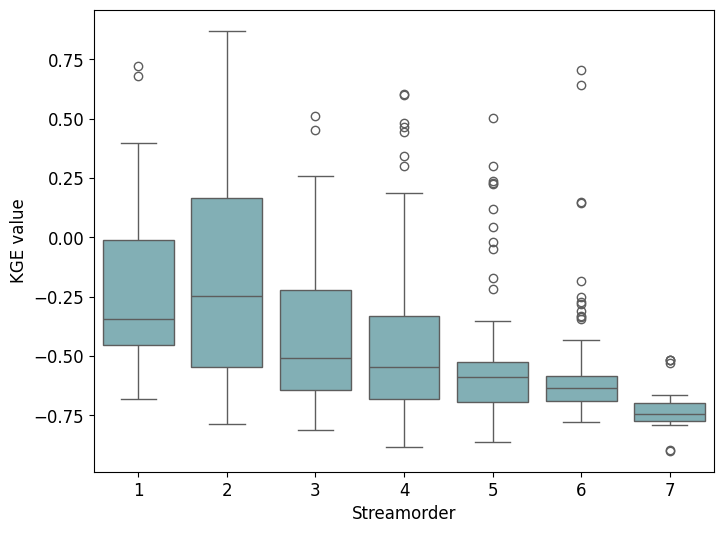

In [208]:
# markers = {"propZero":""}
f,ax = plt.subplots(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})


ax = sns.boxplot(toPlot,
                x = "streamorde",
                y = "value",
                color="#79B5BD")
    




ax.set(ylabel="KGE value")
ax.set(xlabel="Streamorder")
# ax.grid('on', which='major', axis='y')
# ax.axhline(y=-0.41, color='black', linestyle='-.',alpha=.5)

# plt.tight_layout()


f.savefig('../docs/KGE_Streamorder.png',dpi=600)

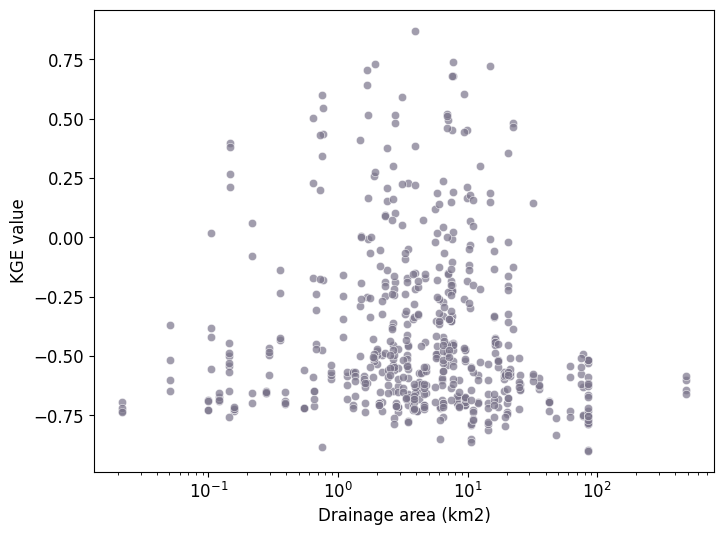

In [209]:
# markers = {"propZero":""}
f,ax = plt.subplots(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})


ax = sns.scatterplot(toPlot,
                x = "areasqkm",
                y = "value",
                alpha = 0.7,
                color=["#7A748A"],
                legend = "brief")



# ax.set_xlim(-0.01,0.81)
ax.set(xscale='log')
ax.set(ylabel="KGE value")
ax.set(xlabel="Drainage area (km2)")
# ax.grid('on', which='major', axis='y')
# ax.axhline(y=-0.41, color='black', linestyle='-.',alpha=.5)

# plt.tight_layout()


f.savefig('../docs/KGE_DrainageArea.png',dpi=600)